# <p style="background-color: #f5df18; padding: 10px;"> Foundations of Astronomical Data Science | **Basic Queries** </p>

### <strong>Instructor: <span style="color: darkblue;">Dr. Devontae C. Baxter (UCSD)</span></strong>

#### Estimated completion time: 🕚 90 minutes


## Learning Objectives

* Compose a basic query in ADQL/SQL.
* Use queries to explore a database and its tables.
* Use queries to download data.
* Develop, test, and debug a query incrementally.

As a running example, we will replicate parts of the analysis in the paper, “[Off the beaten path: Gaia reveals GD-1 stars outside of the main stream](https://arxiv.org/abs/1805.00425)” by Adrian Price-Whelan and Ana Bonaca.

## GD-1 Stellar Stream
---



<div>
<img src="https://s3.amazonaws.com/aasie/images/1538-4357/643/1/L17/10_1086_505111_fg1_hr.jpg" width="800"/>
</div>

**Credit**: [Grillmair & Dionatos 2006](https://ui.adsabs.harvard.edu/abs/2006ApJ...643L..17G/abstract)

## Globular Cluster 
---

<div>
<img src="https://cdn.esahubble.org/archives/images/screen/potw1225a.jpg" width="500"/>
</div>

**Credit**: [ESA/Hubble & NASA](https://esahubble.org/images/potw1225a/)

## 🗓 Outline 
---

This lesson demonstrates the steps for selecting and downloading data from the Gaia Database:

1. First we will make a connection to the Gaia server,

2. We will explore information about the database and the tables it contains,

3. We will write a query and send it to the server, and finally

4. We will download the response from the server.











## Query Language
---

In order to select data from a database, you need to compose a query,
which is a program written in a "query language".
The query language we will use is ADQL, which stands for "Astronomical
Data Query Language".

ADQL is a dialect of [SQL](https://en.wikipedia.org/wiki/SQL)
(Structured Query Language), which is by far the most commonly used
query language.  Almost everything you will learn about ADQL also
works in SQL.

[The reference manual for ADQL is
here](https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html).
But you might find it easier to learn from [this ADQL
Cookbook](https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook).


# Connecting to <strong><span style="color: indigo;">Gaia</span></strong>

---




<div>
<img src="https://www.esa.int/var/esa/storage/images/esa_multimedia/videos/2019/10/gaia_astronomical_revolution/21106023-7-eng-GB/Gaia_astronomical_revolution_pillars.jpg" width="1300"/>
</div>

------

The library we will use to get Gaia data is
[Astroquery](https://astroquery.readthedocs.io/en/latest/).
Astroquery provides `Gaia`, which is an [object that represents a
connection to the Gaia
database](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html).

We can connect to the Gaia database like this:



In [6]:
from astroquery.gaia import Gaia

This import statement creates a <a href="https://www.ivoa.net/documents/TAP/">TAP+</a> connection; TAP stands for “Table Access Protocol”, which is a network protocol for sending queries to the database and getting back the results.

# Databases and Tables
---


What is a database?  Most generally, it can be any collection
of data, but when we are talking about ADQL or SQL:

- A database is a collection of one or more **named** tables.

- Each table is a 2-D array with one or more **named** columns of data.



<img src="https://database.guide/wp-content/uploads/2016/06/Relational-Database-Structure-Example-1.png" />




We can use `Gaia.load_tables` to get the names of the tables in the
Gaia database.  With the option `only_names=True`, it loads
information about the tables, called "metadata", but not the data itself.

In [7]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


## Let's create a <span style="color: red;">for</span> loop to print the table names

In [8]:
for table in tables:
    print(table.name)

external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.gaia_eso_survey
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaiadr1.urat1_best_neighbour
gaiadr1.urat1_neighbourhood
gaiadr1.cepheid
gaiadr1.phot_variable_time_serie

So that is a lot of tables.  The ones we will use are:

- `gaiadr2.gaia_source`, which contains Gaia data from [data release
  2](https://www.cosmos.esa.int/web/gaia/data-release-2),

- `gaiadr2.panstarrs1_original_valid`, which contains the photometry
  data we will use from PanSTARRS, and

- `gaiadr2.panstarrs1_best_neighbour`, which we will use to cross-match
  each star observed by Gaia with the same star observed by PanSTARRS.

We can use `load_table` (not `load_tables`) to get the metadata for a
single table.  The name of this function is misleading, because it
only downloads metadata, not the contents of the table.

### Let's load the metadata for a single table

In [9]:
table_metadata = Gaia.load_table('gaiadr2.gaia_source')

Retrieving table 'gaiadr2.gaia_source'


In [10]:
table_metadata

Jupyter shows that the result is an object of type `TapTableMeta`, but
it does not display the contents.

To see the metadata, we have to print the object.

In [11]:
print(table_metadata)

TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 96


# Columns
----

### Let's create a <span style="color: red;">for</span> loop to print _**names**_ of the columns in the table.

In [12]:
for column in table_metadata.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mean_ma

You can probably infer what many of these columns are by looking at
the names, but you should resist the temptation to guess.
To find out what the columns mean, [read the
documentation](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html).

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (2 Minutes) </p>

---

One of the other tables we will use is
`gaiadr2.panstarrs1_original_valid`.  Use `load_table` to get the
metadata for this table.  How many columns are there and what are
their names?

In [17]:
## solution

panstarrs_metadata = Gaia.load_table('gaiadr2.panstarrs1_original_valid')

Retrieving table 'gaiadr2.panstarrs1_original_valid'


In [18]:
print(panstarrs_metadata)

TAP Table name: gaiadr2.gaiadr2.panstarrs1_original_valid
Description: The Panoramic Survey Telescope and Rapid Response System (Pan-STARRS) is
a system for wide-field astronomical imaging developed and operated by
the Institute for Astronomy at the University of Hawaii. Pan-STARRS1
(PS1) is the first part of Pan-STARRS to be completed and is the basis
for Data Release 1 (DR1). The PS1 survey used a 1.8 meter telescope and
its 1.4 Gigapixel camera to image the sky in five broadband filters (g,
r, i, z, y).

The current table contains a filtered subsample of the 10 723 304 629
entries listed in the original ObjectThin table.
We used only ObjectThin and MeanObject tables to extract
panstarrs1OriginalValid table, this means that objects detected only in
stack images are not included here. The main reason for us to avoid the
use of objects detected in stack images is that their astrometry is not
as good as the mean objects astrometry: “The stack positions (raStack,
decStack) have considera

In [19]:
for column in panstarrs_metadata.columns:
    print(column.name)

obj_name
obj_id
ra
dec
ra_error
dec_error
epoch_mean
g_mean_psf_mag
g_mean_psf_mag_error
g_flags
r_mean_psf_mag
r_mean_psf_mag_error
r_flags
i_mean_psf_mag
i_mean_psf_mag_error
i_flags
z_mean_psf_mag
z_mean_psf_mag_error
z_flags
y_mean_psf_mag
y_mean_psf_mag_error
y_flags
n_detections
zone_id
obj_info_flag
quality_flag


# Writing queries

---

You might be wondering how we download these tables. With tables this big, you generally don’t. Instead, you use queries to select only the data you want.

A query is a program written in a query language like SQL. For the Gaia database, the query language is a dialect of SQL called ADQL.

Here’s an example of an ADQL query.

```python
query1 = """SELECT 
TOP 10
source_id, ra, dec, parallax 
FROM gaiadr2.gaia_source
"""
```

In [20]:
query1 = """SELECT 
TOP 10
source_id, ra, dec, parallax
FROM gaiadr2.gaia_source"""

## 🔔 Triple-quotes strings
---


We use a [triple-quoted string](https://docs.python.org/3/tutorial/introduction.html#strings)
here so we can include line breaks in the query, which makes it easier
to read.

The words in uppercase are ADQL keywords:

- `SELECT` indicates that we are selecting data (as opposed to adding
  or modifying data).

- `TOP` indicates that we only want the first 10 rows of the table,
  which is useful for testing a query before asking for all of the data.

- `FROM` specifies which table we want data from.

The third line is a list of column names, indicating which columns we want.

In this example, the keywords are capitalized and the column names are
lowercase.  This is a common style, but it is not required.  ADQL and
SQL are not case-sensitive.

Also, the query is broken into multiple lines to make it more
readable.  This is a common style, but not required.  Line breaks
don't affect the behavior of the query.

To run this query, we use the `Gaia` object, which represents our
connection to the Gaia database, and invoke `launch_job`:

In [22]:
job1 = Gaia.launch_job(query1)
job1

The result is an object that represents the job running on a Gaia server.

If you <span style="color: red;">print</span> it, it displays metadata for the forthcoming results.

In [23]:
print(job1)

<Table length=10>
   name    dtype  unit                            description                            
--------- ------- ---- ------------------------------------------------------------------
SOURCE_ID   int64      Unique source identifier (unique within a particular Data Release)
       ra float64  deg                                                    Right ascension
      dec float64  deg                                                        Declination
 parallax float64  mas                                                           Parallax
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1715480783717O-result.vot
Results: None


Don't worry about `Results: None`.  That does not actually mean there
are no results.

However, `Phase: COMPLETED` indicates that the job is complete, so we
can get the results like this:

In [24]:
results1 = job1.get_results()

In [26]:
type(results1)

astropy.table.table.Table

The `type` function indicates that the result is an [Astropy
Table](https://docs.astropy.org/en/stable/table/).

---
## 🔔 **Repetition** 
 
Why is `table` repeated three times?  The first
is the name of the module, the second is the name of the submodule,
and the third is the name of the class.  Most of the time we only care
about the last one. It’s like the [scientific name for the Western lowland gorilla](https://ielc.libguides.com/sdzg/factsheets/westernlowlandgorilla/taxonomy#:~:text=Subfamily%3A%20Homininae,gorilla%20gorilla%20(Western%20lowland%20gorilla), which is Gorilla gorilla gorilla.


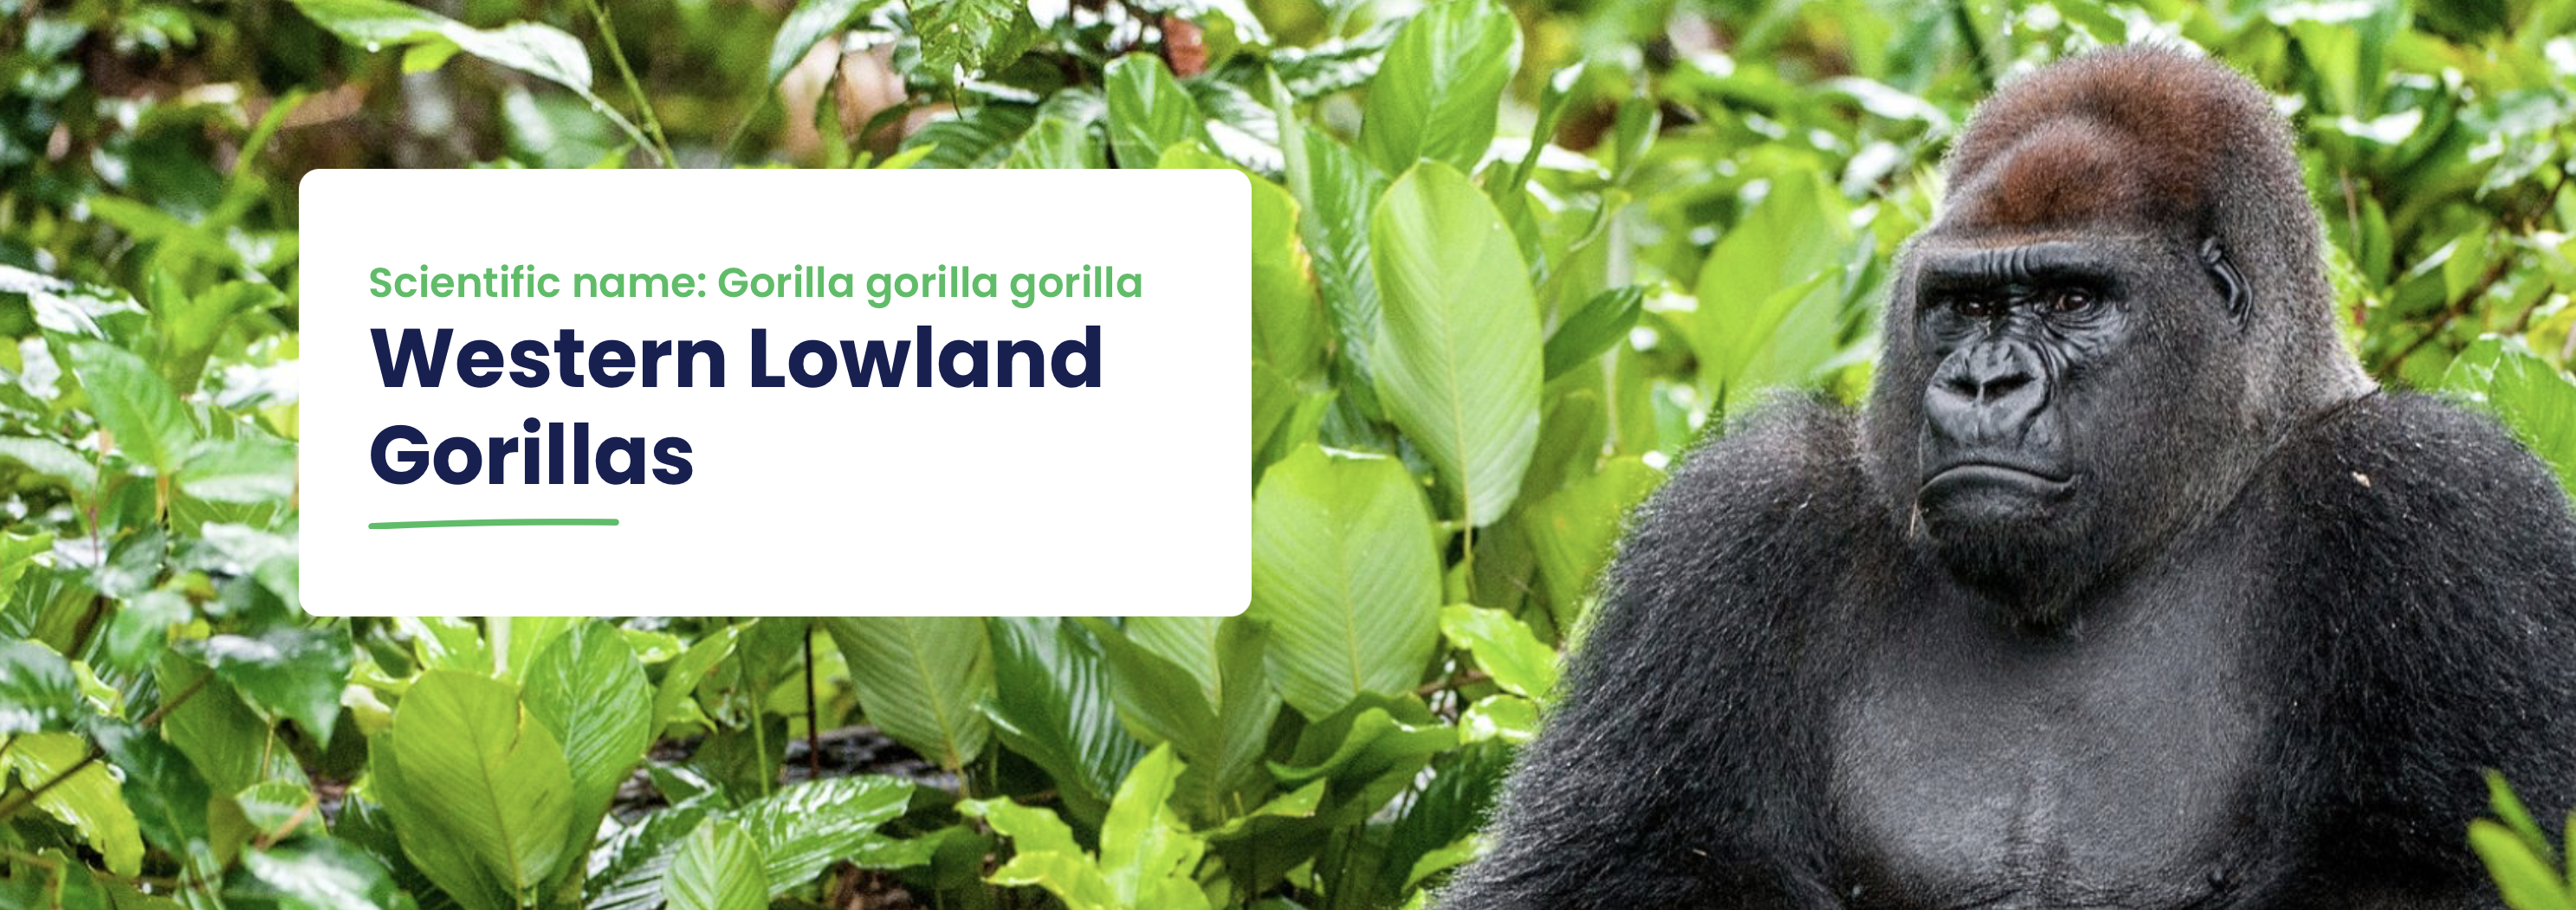

---

An Astropy `Table` is similar to a table in an SQL database except:

- SQL databases are stored on disk drives, so they are persistent;
  that is, they "survive" even if you turn off the computer.  An Astropy
  `Table` is stored in memory; it disappears when you turn off the
  computer (or shut down your Jupyter notebook).

- SQL databases are designed to process queries.  An Astropy `Table`
  can perform some query-like operations, like selecting columns and
  rows.  But these operations use Python syntax, not SQL.

Jupyter knows how to display the contents of a `Table`.

In [27]:
results1

<Table length=10>
     SOURCE_ID              ra                dec               parallax      
                           deg                deg                 mas         
       int64             float64            float64             float64       
------------------- ------------------ ------------------ --------------------
4464195329654279808 243.36304525767025 13.332207539188948  0.16439076081079823
4464157602662621312    245.76072515952 15.362547713561668  -0.2110296432373516
4464174164056625024 246.29390759706718  15.47257793268518   0.4746433256414075
4464158186777864192 246.11665685784646   15.1492979577105  0.29595400139231925
4464194092703698048 243.32130865040432 13.330617936122106   0.9563165300756201
4464185571489765376  246.0771571149933 15.475361948153898   0.3581981880000272
4464057757557728512  246.0506722084623  14.64822560418678   0.2130643096328948
4464152311262771968 245.87683702199857 15.255548579139372 -0.40638837982933834
4464241268624812672 243.88258608658998 13.903782305036847 -0.19420855523180477
4464064419051281024 246.39883051914418  14.80697876478872  -1.4422448853355199

Each column has a name, units, and a data type.

For example, the units of `ra` and `dec` are degrees, and their data
type is `float64`, which is a 64-bit [floating-point
number](https://en.wikipedia.org/wiki/Floating-point_arithmetic), used
to store measurements with a fraction part.

This information comes from the Gaia database, and has been stored in
the Astropy `Table` by Astroquery.

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (3 Minutes) </p>
---


Read [the documentation](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html)
of this table and choose a column that looks interesting to you.  Add
the column name to the query and run it again.  What are the units of
the column you selected?  What is its data type?

In [28]:
## My solution

## phot_g_mean_flux

query1_with_g_flux = """SELECT
TOP 10
source_id, ra, dec, parallax, phot_g_mean_flux
FROM gaiadr2.gaia_source"""


job1_with_g_flux = Gaia.launch_job(query1_with_g_flux)

results1_with_g_flux = job1_with_g_flux.get_results()


In [29]:
results1_with_g_flux

<Table length=10>
     SOURCE_ID              ra         ...  phot_g_mean_flux 
                           deg         ...    electron / s   
       int64             float64       ...      float64      
------------------- ------------------ ... ------------------
4464195329654279808 243.36304525767025 ... 1040.7444138556634
4464157602662621312    245.76072515952 ...  231.9642586365771
4464174164056625024 246.29390759706718 ...  218.2482954981802
4464158186777864192 246.11665685784646 ... 129.97793250146907
4464194092703698048 243.32130865040432 ... 185.81835881884385
4464185571489765376  246.0771571149933 ... 1246.2973504979536
4464057757557728512  246.0506722084623 ...  86.51451917528921
4464152311262771968 245.87683702199857 ...  88.18581878554077
4464241268624812672 243.88258608658998 ... 225.51733328569765
4464064419051281024 246.39883051914418 ...  94.56643503255353

# Asynchronous queries

---

`launch_job` asks the server to run the job "synchronously", which
normally means it runs immediately.  But synchronous jobs are limited
to 2000 rows.  For queries that return more rows, you should run
"asynchronously", which mean they might take longer to get started.

If you are not sure how many rows a query will return, you can use the
SQL command `COUNT` to find out how many rows are in the result
without actually returning them.  We will see an example in the next
lesson.

The results of an asynchronous query are stored in a file on the
server, so you can start a query and come back later to get the
results.
For anonymous users, files are kept for three days.

As an example, let us try a query that is similar to `query1`, with these changes:

- It selects the first 3000 rows, so it is bigger than we should run
  synchronously.

- It selects two additional columns, `pmra` and `pmdec`, which are
  proper motions along the axes of `ra` and `dec`.

- It uses a new keyword, `WHERE`.

In [30]:
query2 = """SELECT
TOP 3000
source_id, ra, dec, parallax, pmra, pmdec
FROM gaiadr2.gaia_source
WHERE parallax < 1"""

A `WHERE` clause indicates which rows we want; in this case, the query
selects only rows "where" `parallax` is less than 1.  This has the
effect of selecting stars with relatively low parallax, which are
farther away.
We'll use this clause to exclude nearby stars that are unlikely to be
part of GD-1.

`WHERE` is one of the most common clauses in ADQL/SQL, and one of the
most useful, because it allows us to download only the rows we need
from the database.

We use `launch_job_async` to submit an asynchronous query.

In [31]:
job2 = Gaia.launch_job_async(query2)

INFO: Query finished. [astroquery.utils.tap.core]


And here are the results.

In [32]:
results2 = job2.get_results()

In [33]:
results2

<Table length=3000>
     SOURCE_ID              ra         ...        pmdec       
                           deg         ...       mas / yr     
       int64             float64       ...       float64      
------------------- ------------------ ... -------------------
4464195329654279808 243.36304525767025 ...  -3.441298033102305
4464157602662621312    245.76072515952 ...  2.4402691076146428
4464174164056625024 246.29390759706718 ...  -15.68232420624172
4464158186777864192 246.11665685784646 ... 0.15197524558621486
4464194092703698048 243.32130865040432 ...  -5.321352978282461
4464185571489765376  246.0771571149933 ...  -5.336187466029946
                ...                ... ...                 ...
2047214509741885440 295.24098483113613 ...  -2.248799876288064
2047249492264160384   294.555194847184 ...  -7.119269649560746
2047240593102815872  294.3428005194154 ... -10.214532150735327
2047211078071154304  294.9798469313157 ...  -4.353523618754814
2047220149057610112 295.12792194981273 ... -5.7462960061921375
2047212280659447040 295.20180227857117 ...  -5.607754605464406

You might notice that some values of `parallax` are negative.  As
[this FAQ
explains](https://www.cosmos.esa.int/web/gaia/archive-tips#negative%20parallax),
"Negative parallaxes are caused by errors in the observations."  They
have "no physical meaning," but they can be a "useful diagnostic on
the quality of the astrometric solution."

---
## 🔔 **Different Results** 


Your results for this query may differ from the Instructor's. This is because
`TOP 3000` returns 3000 results, but those results are not organized in any
particular way.

---

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (5 Minutes) </p>

---
The clauses in a query have to be in the right order.  Go back and
change the order of the clauses in `query2` and run it again.
The modified query should fail, but notice that you don't get much
useful debugging information.

For this reason, developing and debugging ADQL queries can be really
hard.  A few suggestions that might help:

- Whenever possible, start with a working query, either an example you
  find online or a query you have used in the past.

- Make small changes and test each change before you continue.

- While you are debugging, use `TOP` to limit the number of rows in
  the result.  That will make each test run faster, which reduces your
  development time.

- Launching test queries synchronously might make them start faster, too.

In [34]:
### Solution 

query2_erroneous = """SELECT
TOP 3000
WHERE parallax < 1
source_id, ra, dec, parallax, pmra, pmdec
FROM gaiadr2.gaia_source"""

In [35]:
job2_erroneous = Gaia.launch_job_async(query2_erroneous)

500 Error 500:
null


HTTPError: Error 500:
null

# Operators

---

In a `WHERE` clause, you can use any of the [SQL comparison
operators](https://www.w3schools.com/sql/sql_operators.asp); here are
the most common ones:
<br>
| Symbol | Operation             | 
| ------ | :-------------------- |
| `>`       | greater than          | 
| `<`       | less than             | 
| `>=`       | greater than or equal | 
| `<=`       | less than or equal    | 
| `=`       | equal                 | 
| `!=` or `<>`   | not equal             | 
<br>

Most of these are the same as Python, but some are not.  In
particular, notice that the equality operator is `=`, not `==`.
Be careful to keep your Python out of your ADQL!

You can combine comparisons using the logical operators:

- AND: true if both comparisons are true
- OR: true if either or both comparisons are true

Finally, you can use `NOT` to invert the result of a comparison.



## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (5 Minutes) </p>
---


[Read about SQL operators here](https://www.w3schools.com/sql/sql_operators.asp)
and then modify
the previous query to select rows where `bp_rp` is between `-0.75` and
`2`.



In [43]:
### solution 

query2_exercise = """SELECT 
TOP 3000
source_id, ra, dec, parallax, pmra, pmdec
FROM gaiadr2.gaia_source
WHERE parallax < 1 
AND bp_rp > -0.75 AND bp_rp <2.0"""

### Note, you can also use bp_rp BETWEEN -0.75 AND 2

In [44]:
job2_exercise = Gaia.launch_job_async(query2_exercise)

INFO: Query finished. [astroquery.utils.tap.core]


In [45]:
results2_exercise = job2_exercise.get_results()

In [46]:
results2_exercise

<Table length=3000>
     SOURCE_ID              ra         ...        pmdec       
                           deg         ...       mas / yr     
       int64             float64       ...       float64      
------------------- ------------------ ... -------------------
4150375881958687104 269.33521762192083 ...  -2.412594622162317
4150375405217920640 269.28725234899963 ...  -5.172627350208958
4150352040592563584  269.3469881954372 ...   -9.30501408141292
4150364100857750272 269.50371908672355 ...  -4.916657375051117
4150377982192797824  269.4119519331579 ... -1.5390213466719007
4150340976775411584  270.6822852337649 ...  -9.989484866623506
                ...                ... ...                 ...
6725822342077230720  273.7653760544487 ...  -5.793643534791947
6725822200317585664  273.8161316976002 ...  -8.497317618961539
6725812132910224640 273.65291999119785 ...  -2.911491823825427
6725823506004864896  273.6312343098848 ...   -6.59896662942562
6725820727166235776 273.74549752982443 ... -3.9643674723371354
6725836360847960832 273.56883262865864 ... -2.4958160527629363

`bp_rp` contains BP-RP color, which is the difference between two
other columns, `phot_bp_mean_mag` and `phot_rp_mean_mag`.
You can [read about this variable
here](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html).

<br>
<div>
<img src="https://www.cosmos.esa.int/documents/29201/1645651/GaiaDR2Passbands.png/ba8d3078-0e7a-b316-92d9-cdce748e6484?t=1521129245183" width="500"/>
</div>





**Credits**: [ESA/Gaia/DPAC, P. Montegriffo, F. De Angeli, C. Cacciari](https://www.cosmos.esa.int/web/gaia/iow_20180316)

This [Hertzsprung-Russell
diagram](https://sci.esa.int/web/gaia/-/60198-gaia-hertzsprung-russell-diagram)
shows the BP-RP color and luminosity of stars in the Gaia catalog
(Copyright: ESA/Gaia/DPAC, CC BY-SA 3.0 IGO).


<div>
<img src="https://cdn.sci.esa.int/documents/33580/35361/1567214809100-ESA_Gaia_DR2_HRD_Gaia_625.jpg" width="500"/>
</div>


Selecting stars with `bp-rp` less than 2 excludes many [class M dwarf
stars](https://xkcd.com/2360/), which are low temperature, low
luminosity.  A star like that at GD-1's distance would be hard to
detect, so if it is detected, it is more likely to be in the
foreground.

# Formatting queries

---

The queries we have written so far are string "literals", meaning that
the entire string is part of the program.
But writing queries yourself can be slow, repetitive, and error-prone.

It is often better to write Python code that assembles a query for
you.  One useful tool for that is the [string `format`
method](https://www.w3schools.com/python/ref_string_format.asp).

As an example, we will divide the previous query into two parts; a list
of column names and a "base" for the query that contains everything
except the column names.

Here is the list of columns we will select.

In [49]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'

And here is the base. It is a string that contains at least one format
specifier in curly brackets (braces).

In [51]:
query3_base = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
AND bp_rp BETWEEN -0.75 AND 2"""

This base query contains one format specifier, `{columns}`, which is a
placeholder for the list of column names we will provide.

To assemble the query, we invoke `format` on the base string and
provide a keyword argument that assigns a value to `columns`.


In [54]:
query3 = query3_base.format(columns=columns)

In this example, the variable that contains the column names and the
variable in the format specifier have the same name.
That is not required, but it is a common style.

The result is a string with line breaks.  If you display it, the line
breaks appear as `\n`.

In [55]:
query3

'SELECT\nTOP 10\nsource_id, ra, dec, pmra, pmdec, parallax\nFROM gaiadr2.gaia_source\nWHERE parallax < 1\nAND bp_rp BETWEEN -0.75 AND 2'

But if you print it, the line breaks appear as line breaks.

In [56]:
print(query3)

SELECT
TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
AND bp_rp BETWEEN -0.75 AND 2


Notice that the format specifier has been replaced with the value of `columns`.

Let's run it and see if it works:

In [58]:
job3 = Gaia.launch_job(query3)

In [61]:
print(job3)

<Table length=10>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
SOURCE_ID   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1715483858127O-result.vot
Results: None


In [59]:
results3 = job3.get_results()

In [62]:
results3

<Table length=10>
     SOURCE_ID              ra         ...       parallax      
                           deg         ...         mas         
       int64             float64       ...       float64       
------------------- ------------------ ... --------------------
5836228576603820800 240.74303299261805 ...   0.5346078745662572
5836225763478088704 240.64810127260188 ...  0.16221995948659843
5836222396251434112  240.8384267219215 ...   0.9647949760329543
5836216550694735360 241.15989661011977 ...  -0.2989050675108113
4464023810137644160  245.3879567472035 ...   0.6241084951259325
4464190965968761728  246.1013995326179 ...  -0.4969674847430805
4464174610733230208 246.25402890331682 ... -0.49400180118102544
4464180112587443712  245.8720142864651 ... 0.014253957706761395
4464020713464851200  245.4500143409108 ...  0.49542066277611524
4464209245348715008 243.54262091761106 ...   0.5015415126496703

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (5 Minutes) </p>
---

This query always selects sources with `parallax` less than 1.  But
suppose you want to take that upper bound as an input.

Modify `query3_base` to replace `1` with a format specifier like
`{max_parallax}`.  Now, when you call `format`, add a keyword argument
that assigns a value to `max_parallax`, and confirm that the format
specifier gets replaced with the value you provide.


In [66]:
### Solution 

query3_base_sol = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < {max_parallax}
AND bp_rp BETWEEN -0.75 AND bp_rp 2"""

query_sol = query3_base_sol.format(columns=columns, max_parallax=0.5)

In [67]:
print(query_sol)

SELECT
TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 0.5
AND bp_rp BETWEEN -0.75 AND bp_rp 2


# Summary

---

This lesson has demonstrated the following steps:


1. Making a connection to the Gaia server,

2. Exploring information about the database and the tables it contains,

3. Writing a query and sending it to the server, and finally

4. Downloading the response from the server as an Astropy `Table`.

In the next lesson we will extend these queries to select a particular region of the sky.

# <p style="background-color: #f5df18; padding: 10px;"> 🗝️ Key points</p>

---
- If you can't download an entire dataset (or it is not practical) use queries to select the data you need.
- Read the metadata and the documentation to make sure you understand the tables, their columns, and what they mean.
- Develop queries incrementally: start with something simple, test it, and add a little bit at a time.
- Use ADQL features like `TOP` and `COUNT` to test before you run a query that might return a lot of data.
- If you know your query will return fewer than 3000 rows, you can run it synchronously.  If it might return more than 3000 rows, you should run it asynchronously.
- ADQL and SQL are not case-sensitive. You don't have to capitalize the keywords, but it will make your code more readable.
- ADQL and SQL don't require you to break a query into multiple lines, but it will make your code more readable.
- Make each section of the notebook self-contained.  Try not to use the same variable name in more than one section.
- Keep notebooks short.  Look for places where you can break your analysis into phases with one notebook per phase.
